In [1]:
import os 
import glob
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.MSI.run_meta.organized.tsv', sep='\t')
dict_HRRid_to_metadata = { tup.Accession : [tup.SampleID, tup.PatientID, tup.TreatmentStage, tup.BiopsySite, tup.TMB, tup.Response ] for tup in df_metadata.itertuples() }

In [3]:
set(df_metadata[df_metadata['Response']=='PR']['PatientID'])

{'P15', 'P17', 'P19', 'P24'}

## Load adata

In [6]:
DIR_cellranger_tumor_out = '/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Tumor'
list_DIR_cellranger_tumor = [ d for d in glob.glob( f'{DIR_cellranger_tumor_out}/*' ) if os.path.isdir(d)==True ]

list_adata = list()

for idx, DIR_cellranger_tumor in enumerate(list_DIR_cellranger_tumor):
    
    HRR_id = DIR_cellranger_tumor.split("/")[-1]
    print(f"{idx+1}/{len(list_DIR_cellranger_tumor)}", flush=True, )
    
    PATH_adata          = f'{DIR_cellranger_tumor}/outs/filtered_feature_bc_matrix.h5'
    PATH_scrublet_adata = f'{DIR_cellranger_tumor}/outs/filtered_feature_bc_matrix.scrublet.h5'
    
    if os.path.exists(PATH_adata) == False and os.path.exists(PATH_scrublet_adata)==False:
        continue
    
    if os.path.exists( PATH_scrublet_adata ):   # Scrublet has been done
        t_adata = sc.read_h5ad( PATH_scrublet_adata ) 
    
    else:
        t_adata = sc.read_10x_h5(PATH_adata)    # Scrublet has yet to be done

        t_adata.obs['HRR_id']    = HRR_id
        t_adata.obs['SampleID']  = dict_HRRid_to_metadata[HRR_id][0]
        t_adata.obs['PatientID'] = dict_HRRid_to_metadata[HRR_id][1]
        t_adata.obs['TreatmentStage']  = dict_HRRid_to_metadata[HRR_id][2]
        t_adata.obs['BiopsySite']  = dict_HRRid_to_metadata[HRR_id][3]
        t_adata.obs['TMB']  = dict_HRRid_to_metadata[HRR_id][4]
        t_adata.obs['Response']  = dict_HRRid_to_metadata[HRR_id][5]
        
        t_adata.obs_names_make_unique()
        t_adata.var_names_make_unique()
        sc.pp.scrublet(t_adata)
        t_adata.write(PATH_scrublet_adata)
    
    list_adata.append( t_adata )

1/112


2/112
3/112
4/112
5/112
6/112
7/112
8/112
9/112
10/112
11/112
12/112
13/112
14/112
15/112
16/112
17/112
18/112
19/112
20/112
21/112
22/112
23/112
24/112
25/112
26/112
27/112
28/112
29/112
30/112
31/112
32/112
33/112
34/112
35/112
36/112
37/112
38/112
39/112
40/112
41/112
42/112
43/112
44/112
45/112
46/112
47/112
48/112
49/112
50/112
51/112
52/112
53/112
54/112
55/112
56/112
57/112
58/112
59/112
60/112
61/112
62/112
63/112
64/112
65/112
66/112
67/112
68/112
69/112
70/112
71/112
72/112
73/112
74/112
75/112
76/112
77/112
78/112
79/112
80/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


81/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


82/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


83/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


84/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


85/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


86/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


87/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


88/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


89/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


90/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


91/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


92/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


93/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


94/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


95/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


96/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


97/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


98/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


99/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


100/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


101/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


102/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


103/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


104/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


105/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


106/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


107/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


108/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


109/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


110/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


111/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


112/112


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [25]:
adata = sc.concat( list_adata  )
adata.var = list_adata[0].var
adata.obs_names_make_unique()

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
adata.write('/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Tumor/merged_adata.1031.h5')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Tumor/merged_adata.1031.h5')

In [26]:
print(adata.shape)
adata = adata[adata.obs['doublet_score']<=0.1]
print(adata.shape)
sc.pp.filter_cells(adata, min_genes=600)
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)

(705985, 36601)
(640028, 36601)


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:166: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


(449852, 30480)


In [27]:
adata.raw = adata
adata.layers["counts"] = adata.X.copy()

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=4000, batch_key="SampleID")
adata = adata[:, adata.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


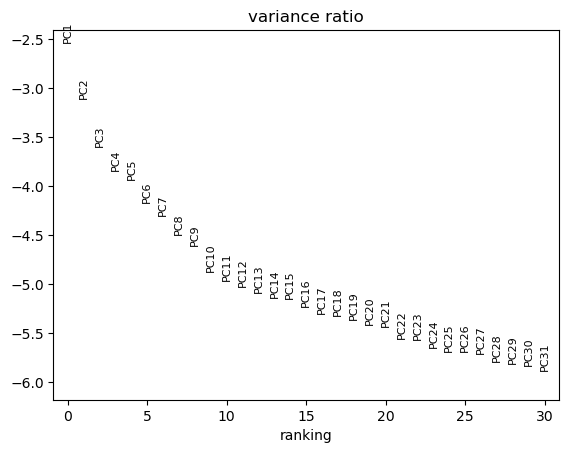

In [28]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, n_pcs=30, log=True)

In [22]:
adata.obs.columns

Index(['HRR_id', 'SampleID', 'PatientID', 'TreatmentStage', 'BiopsySite',
       'TMB', 'Response', 'doublet_score', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'],
      dtype='object')

In [33]:
sc.pp.neighbors(adata, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata)

for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-01 14:11:43.878887: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 14:11:43.893171: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-01 14:11:44.385563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-01 14:11:44.545372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting

In [40]:
adata.write('/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Tumor/merged_adata.1031.umap.h5')

In [12]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Tumor/merged_adata.1031.umap.h5')

## Cell type annotation

### Author annotation

In [13]:
author_adata_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/AuthorProcessedData/GSE236581_CRC-ICB_metadata.txt.gz', sep=' ')
author_adata_metadata['CRC_number'] = [ Ident.split("-")[0] for Ident in author_adata_metadata['Ident'] ]

In [14]:
dict_patientID_to_CRCnumber = { Patient : edf.iloc[0].CRC_number for Patient, edf in author_adata_metadata.groupby("Patient") }
dict_UniqueIdentifier_to_celltype = { tup.Index : [tup.MajorCellType, tup.SubCellType] for tup in author_adata_metadata.itertuples() }

In [15]:
adata.obs['Cell_UniqueIdentifier'] = [ f'{dict_patientID_to_CRCnumber[tup.PatientID]}-{"-".join(tup.SampleID.split("-")[1:])}_{tup.Index.split("-")[0]}' for tup in adata.obs.itertuples() ]
for CUI in adata.obs['Cell_UniqueIdentifier']:
    try: dict_UniqueIdentifier_to_celltype[CUI]
    except KeyError: dict_UniqueIdentifier_to_celltype[CUI] = [None, None]
adata.obs['MajorCellType']  = [ dict_UniqueIdentifier_to_celltype[CUI][0] for CUI in adata.obs['Cell_UniqueIdentifier'] ]
adata.obs['SubCellType']    = [ dict_UniqueIdentifier_to_celltype[CUI][1] for CUI in adata.obs['Cell_UniqueIdentifier'] ]

In [16]:
MajorCellType_conversion_perc   = 100 * len(adata.obs[['MajorCellType']].dropna()) / len(adata.obs)
SubCellType_conversion_perc     = 100 * len(adata.obs[['SubCellType']].dropna()) / len(adata.obs)

print(MajorCellType_conversion_perc, SubCellType_conversion_perc)

79.89160879578172 79.89160879578172


In [17]:
adata = adata[adata.obs['MajorCellType']!=None]

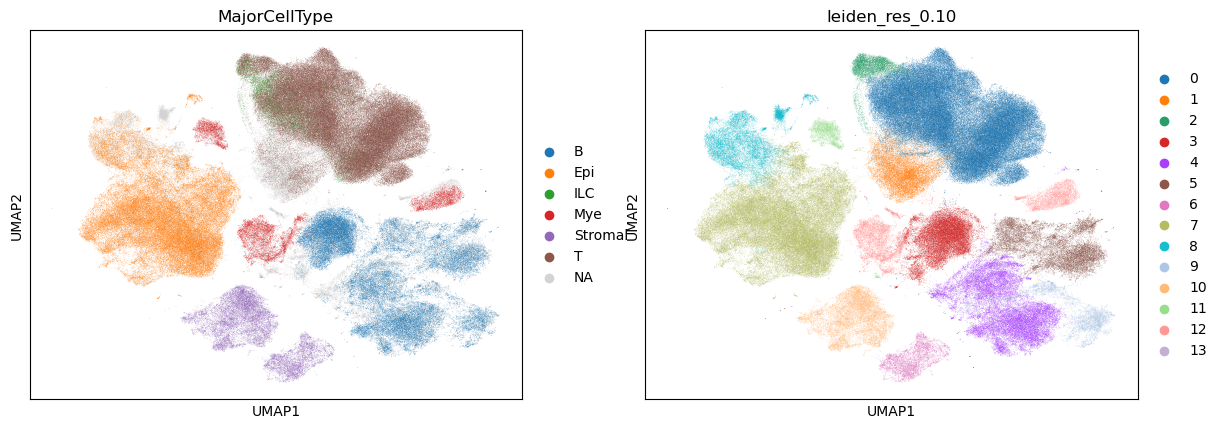

In [88]:
sc.pl.umap(adata, color=['MajorCellType', 'leiden_res_0.10'])

### Epithelial cell analysis

#### Get Normal samples

In [18]:
DIR_cellranger_NAT_out = '/node200data/18parkky/datasets/data/public/BAM/Immunotherapy_CRC_Chen_et_al/MSI/Adjacent_normal_tissue'
list_DIR_cellranger_NAT = [ d for d in glob.glob( f'{DIR_cellranger_NAT_out}/*' ) if os.path.isdir(d)==True ]

list_adata = list()

for idx, DIR_cellranger_NAT in enumerate(list_DIR_cellranger_NAT):
    
    HRR_id = DIR_cellranger_NAT.split("/")[-1]
    print(f"{idx+1}/{len(list_DIR_cellranger_NAT)}", flush=True, )
    
    PATH_adata          = f'{DIR_cellranger_NAT}/outs/filtered_feature_bc_matrix.h5'
    PATH_scrublet_adata = f'{DIR_cellranger_NAT}/outs/filtered_feature_bc_matrix.scrublet.h5'
    
    if os.path.exists(PATH_adata) == False and os.path.exists(PATH_scrublet_adata)==False:
        continue
    
    if os.path.exists( PATH_scrublet_adata ):   # Scrublet has been done
        t_adata = sc.read_h5ad( PATH_scrublet_adata ) 
    
    else:
        t_adata = sc.read_10x_h5(PATH_adata)    # Scrublet has yet to be done

        t_adata.obs['HRR_id']    = HRR_id
        t_adata.obs['SampleID']  = dict_HRRid_to_metadata[HRR_id][0]
        t_adata.obs['PatientID'] = dict_HRRid_to_metadata[HRR_id][1]
        t_adata.obs['TreatmentStage']  = dict_HRRid_to_metadata[HRR_id][2]
        t_adata.obs['BiopsySite']  = dict_HRRid_to_metadata[HRR_id][3]
        t_adata.obs['TMB']  = dict_HRRid_to_metadata[HRR_id][4]
        t_adata.obs['Response']  = dict_HRRid_to_metadata[HRR_id][5]
        
        t_adata.obs_names_make_unique()
        t_adata.var_names_make_unique()
        sc.pp.scrublet(t_adata)
        t_adata.write(PATH_scrublet_adata)
    
    list_adata.append( t_adata )

1/36
2/36
3/36
4/36
5/36
6/36
7/36
8/36
9/36
10/36
11/36
12/36
13/36
14/36
15/36
16/36
17/36
18/36
19/36
20/36
21/36
22/36
23/36
24/36
25/36
26/36
27/36
28/36
29/36
30/36
31/36
32/36
33/36
34/36
35/36
36/36


In [19]:
adata_NAT = sc.concat( list_adata  )
adata_NAT.var = list_adata[0].var
adata_NAT.obs_names_make_unique()

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata_NAT.var["mt"] = adata_NAT.var_names.str.startswith("MT-")
# ribosomal genes
adata_NAT.var["ribo"] = adata_NAT.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata_NAT.var["hb"] = adata_NAT.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata_NAT, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


#### Merge normal + tumor

#### Analysis

In [102]:
adata_epi = adata[adata.obs['MajorCellType'].isin( ['Epi'] )].copy()
adata_epi = adata_epi.raw.to_adata()

In [103]:
sc.pp.highly_variable_genes(adata_epi, n_top_genes=2000, batch_key="SampleID")
adata_epi.raw = adata_epi
adata_epi = adata_epi[:, adata_epi.var.highly_variable]

sc.tl.pca(adata_epi, svd_solver="arpack")

sc.pp.neighbors(adata_epi, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_epi)

for res in [0.02, 0.1, 0.2, 0.3, 0.5, 1.0]:
    # print(res)
    sc.tl.leiden(
        adata_epi, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


In [123]:
# iCMS score
iCMS3_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/iCMS_marker/iCMS_marker_genes.csv')
iCMS3_up_genes = list( iCMS3_marker['iCMS3_Up'].dropna() )
iCMS3_dw_genes = list( iCMS3_marker['iCMS3_Down'].dropna() )

iCMS2_up_genes = list( iCMS3_marker['iCMS2_Up'].dropna() )
iCMS2_dw_genes = list( iCMS3_marker['iCMS2_Down'].dropna() )

sc.tl.score_genes( adata_epi, iCMS3_up_genes, score_name='iCMS3_up' )
sc.tl.score_genes( adata_epi, iCMS3_dw_genes, score_name='iCMS3_dw' )
sc.tl.score_genes( adata_epi, iCMS2_up_genes, score_name='iCMS2_up' )
sc.tl.score_genes( adata_epi, iCMS2_dw_genes, score_name='iCMS2_dw' )

       'C8orf59', 'AC004130.1', 'NUPL2'],
      dtype='object')


In [124]:
# Cell cycle score
CellCycle_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/cell_cycle/cell_cycle_marker.tsv', sep='\t')
S_phase_marker   = CellCycle_marker[CellCycle_marker['phase']=='S']['gene_symbol']
G2M_phase_marker = CellCycle_marker[CellCycle_marker['phase']=='G2/M']['gene_symbol']
sc.tl.score_genes_cell_cycle(adata_epi, s_genes=S_phase_marker, g2m_genes=G2M_phase_marker )

In [139]:
sc.tl.rank_genes_groups( adata_epi, groupby='leiden_res_0.20', method='wilcoxon' )

In [ ]:
adata_epi.obs["cell_type_lvl1"] = adata_epi.obs["leiden_res_0.20"].map(
    {
        "0" : "Goblet",
        "1" : "Mixed",
        "2" : "HLA-II-positive",
        "3" : "Mixed",
        "4" : "",
        "5" : "",
        "6" : "",
        "7" : "",

    }
)


In [157]:
def shannon_diversity_index(population):
    total = sum(population)
    proportions = [count / total for count in population if count > 0]
    return -sum(p * np.log(p) for p in proportions)

<Axes: xlabel='SDI', ylabel='max_perc'>

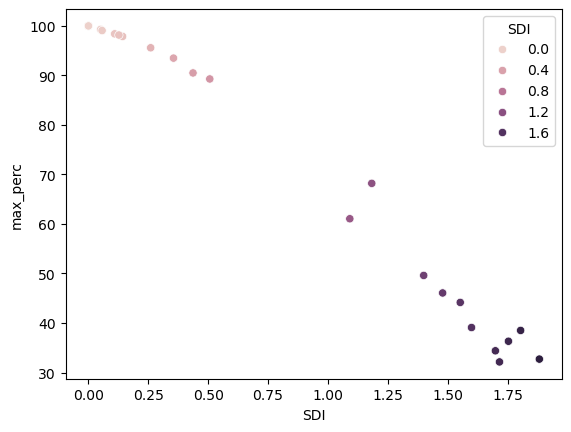

In [199]:
list_cluster_to_diversity = list()
for leiden_cluster, edf in adata_epi.obs.groupby("leiden_res_0.50", observed=False):
    perc_by_patient = [ 100*len(edf2)/len(edf) for patient, edf2 in edf.groupby("PatientID", observed=False) ]
    perc_by_patient.sort()
    SDI = shannon_diversity_index( perc_by_patient )
    max_perc = perc_by_patient[-1]
    avg_perc = perc_by_patient[-2]
    list_cluster_to_diversity.append( [leiden_cluster, SDI, max_perc, avg_perc] )

df_clusterDiversity = pd.DataFrame(list_cluster_to_diversity, columns=['cluster', 'SDI', 'max_perc', 'avg_perc'])
sns.scatterplot(data=df_clusterDiversity, x='SDI', y='max_perc', hue='SDI', )

In [207]:
patient_specific_cluster    = list(df_clusterDiversity[df_clusterDiversity['max_perc']>=60]['cluster'])
patient_nonspecific_cluster = list(df_clusterDiversity[df_clusterDiversity['max_perc']<60]['cluster'])

dict_cluster_to_patientSpecificity = dict()

for cluster in patient_specific_cluster:
    dict_cluster_to_patientSpecificity[cluster] = True
for cluster in patient_nonspecific_cluster:
    dict_cluster_to_patientSpecificity[cluster] = False

In [210]:
adata_epi.obs['patient_specificity'] = [ dict_cluster_to_patientSpecificity[leiden_cluster] for leiden_cluster in adata_epi.obs['leiden_res_0.50'] ]

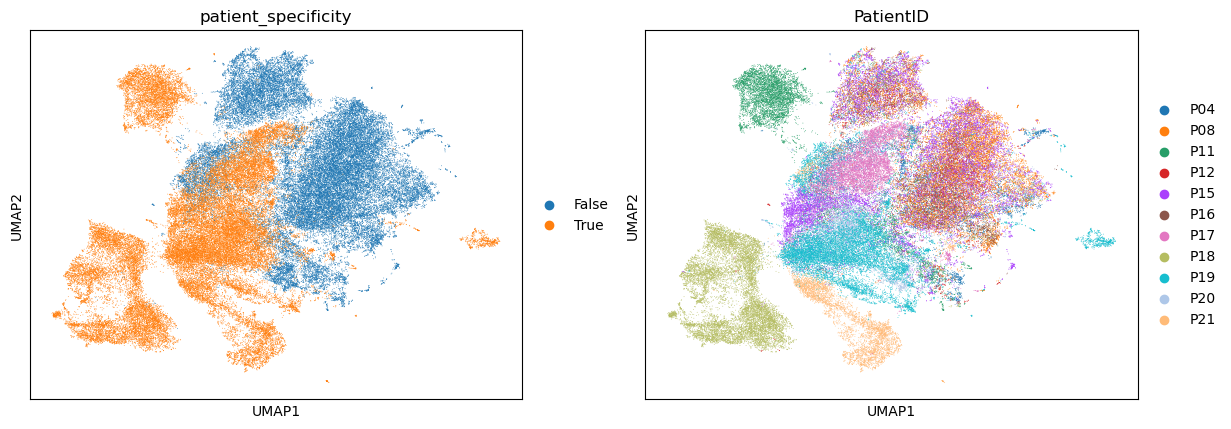

In [211]:
sc.pl.umap(adata_epi, color=['patient_specificity', 'PatientID'])

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


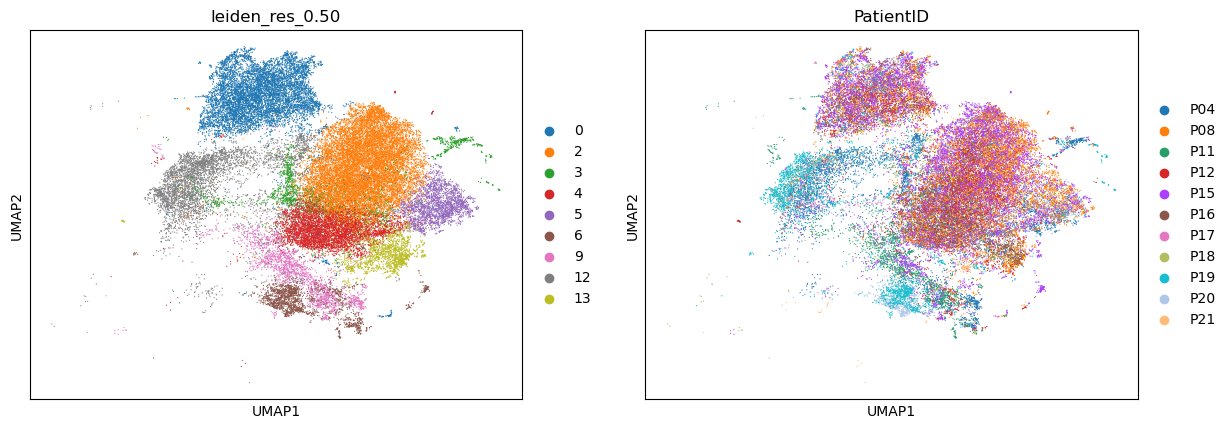

In [204]:
sc.pl.umap(adata_epi[adata_epi.obs['leiden_res_0.50'].isin( df_clusterDiversity[df_clusterDiversity['max_perc']<60]['cluster'] )], color=['leiden_res_0.50', 'PatientID'])

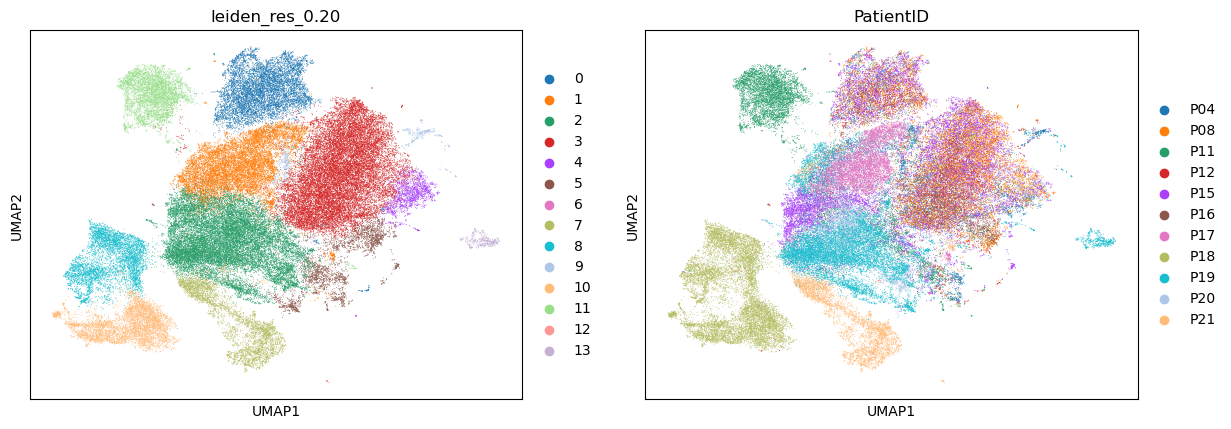

In [156]:
sc.pl.umap(adata_epi, color=['leiden_res_0.20', 'PatientID'])

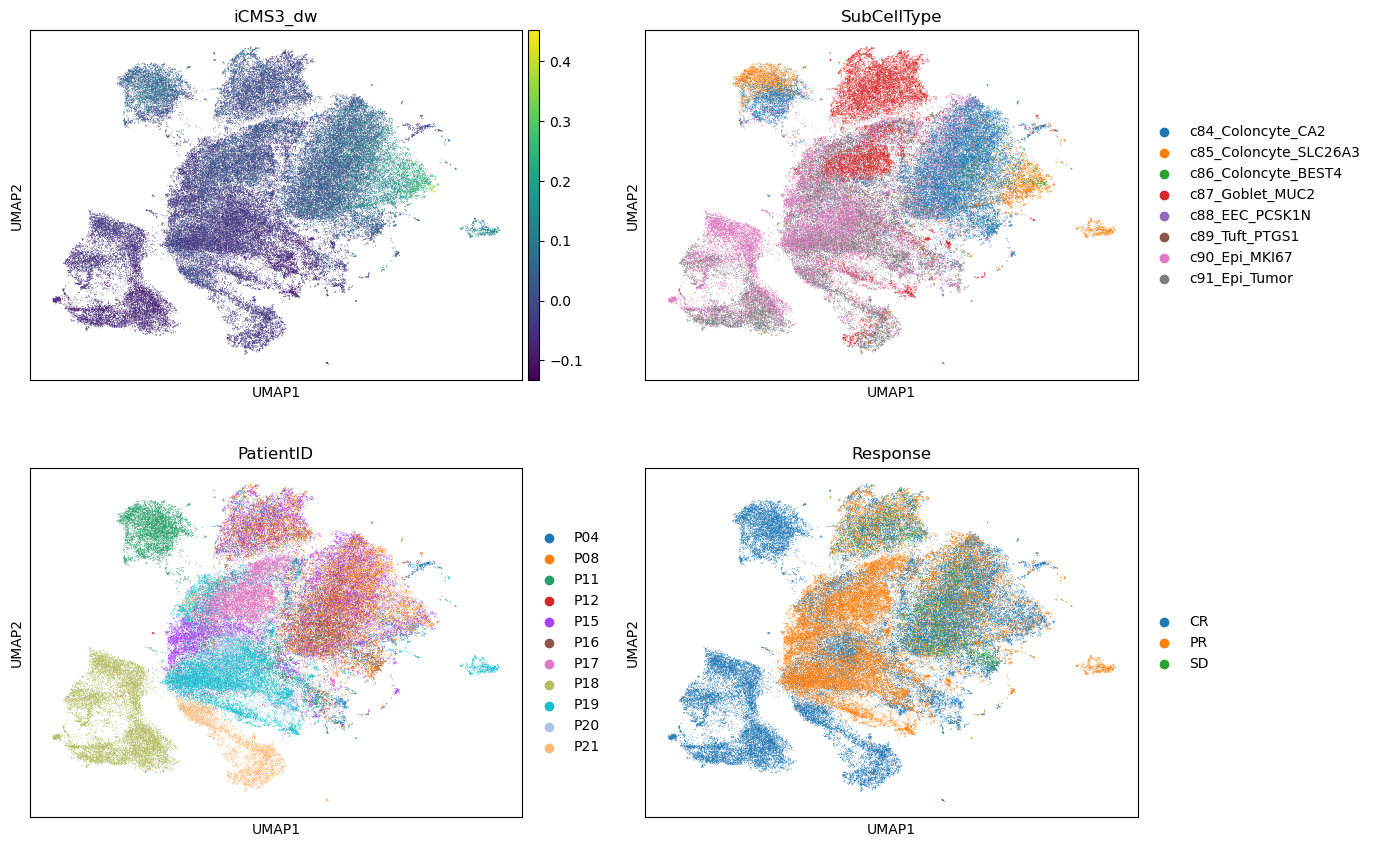

In [170]:
sc.pl.umap(adata_epi, 
           color=['iCMS3_dw', 'SubCellType', 'PatientID', 'Response'], ncols=2)

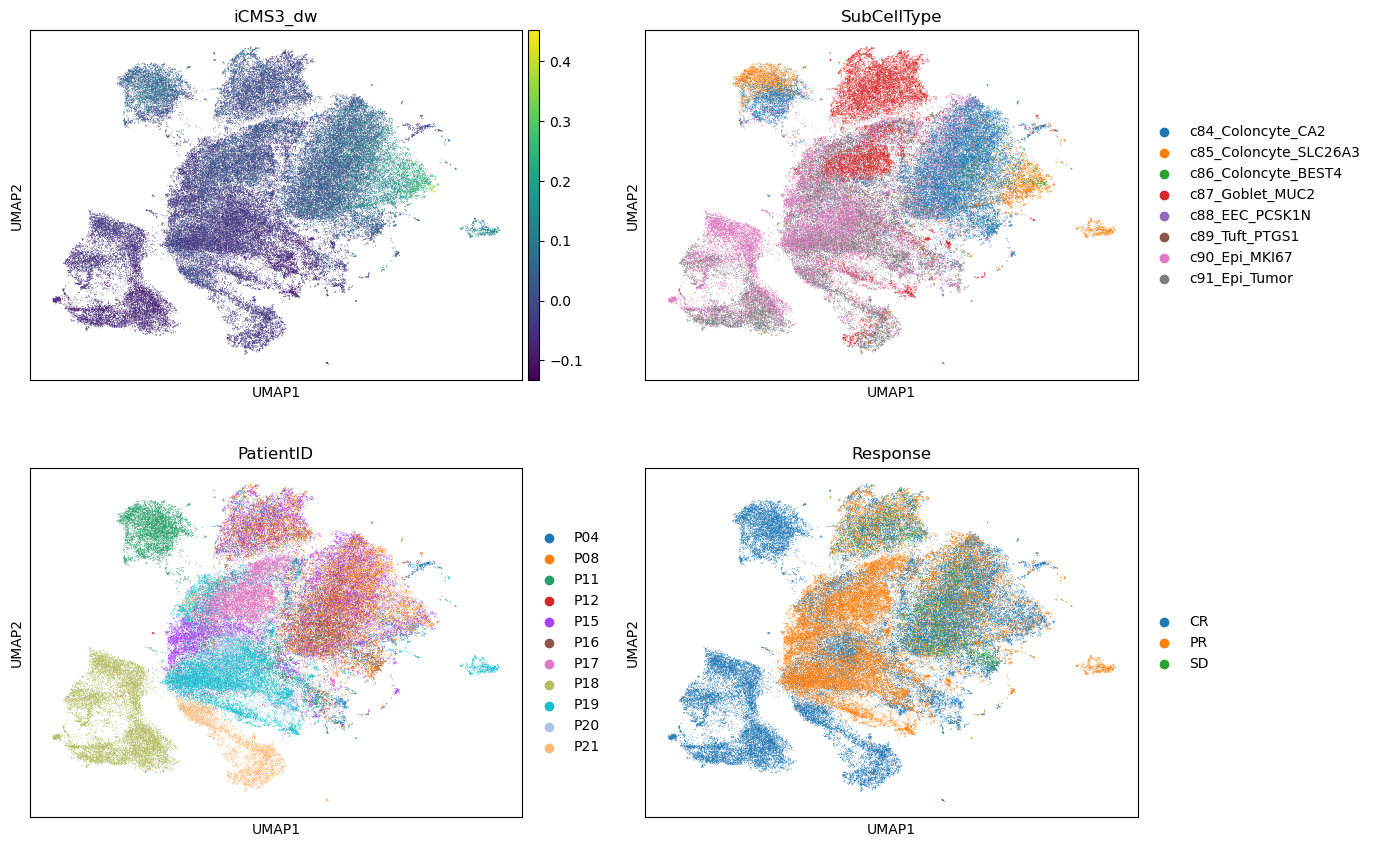

In [129]:
sc.pl.umap(adata_epi, color=['iCMS3_dw', 'SubCellType', 'PatientID', 'Response'], ncols=2)